In [82]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

- In this project we will predect how many miles a car can go on a gallon of fuel according to number of features as Cylinders, Displacement, Horsepower, Weight,Acceleration and Model of Year
- We will use the linear regression model                

In [84]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
#MPG (Miles Per Gallon) -number of miles you can drive using one gallon of fuel

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

- first we have been implemented the Data from URL as shown in previous cell ,then put the column names

In [85]:
#We have made a copy of the Dataset and defined it with a new data frame df
df = raw_dataset.copy()
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [87]:
df['Horsepower'].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

<Axes: xlabel='Horsepower', ylabel='Count'>

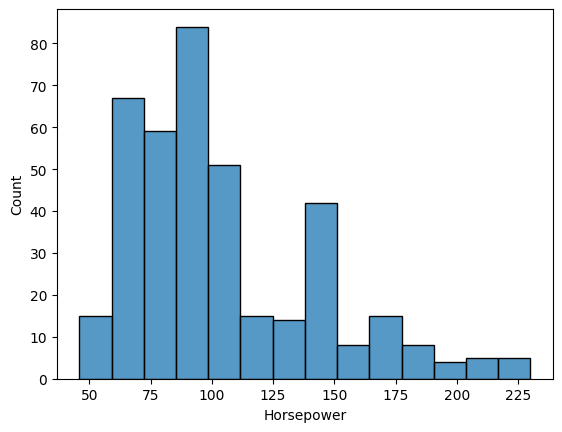

In [88]:


sns.histplot(x=df['Horsepower'])

In [89]:
df['Horsepower'].mode()

0    150.0
Name: Horsepower, dtype: float64

In [90]:
df['Horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: Horsepower, Length: 93, dtype: int64

In [91]:
#As shown in the previous cells, the number of rows is 398,
# and we find that the horsepower column contains 6 nulls.
# Therefore, there are several ways to manipulation of data , including calculating the average of the column values, the median,
# or the most recurring value (mode), and placing it in the place of the nulls.
#However, in this case, I prefer to delete samples that contain nulls.
#Because the relationship between features and label is strong and the number of samples is small,
# any manipulation of the values ​​will negatively affect the efficiency of the results.
df.dropna(inplace= True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [92]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [93]:
df['Origin'].unique()

array([1, 3, 2])

In [94]:
#Here we encoded the origin column so that the value of 1, 2 and 3 represent USA, Europe and Japan respectively.

def Made_in(Origin):
  if Origin ==1:
    return 'Usa'
  elif Origin ==2:
    return 'Europe'
  else:
    return 'Japan'



In [95]:
df['Made_in']=df['Origin'].apply(Made_in)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Made_in
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,Usa
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,Usa
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,Usa
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,Usa
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,Usa
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,Usa
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,Usa
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,Usa


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
 8   Made_in       392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [97]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Made_in
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,Usa
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,Usa
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,Usa
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,Usa
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,Usa


In [98]:
df['Cylinders'].unique()

array([8, 4, 6, 3, 5])

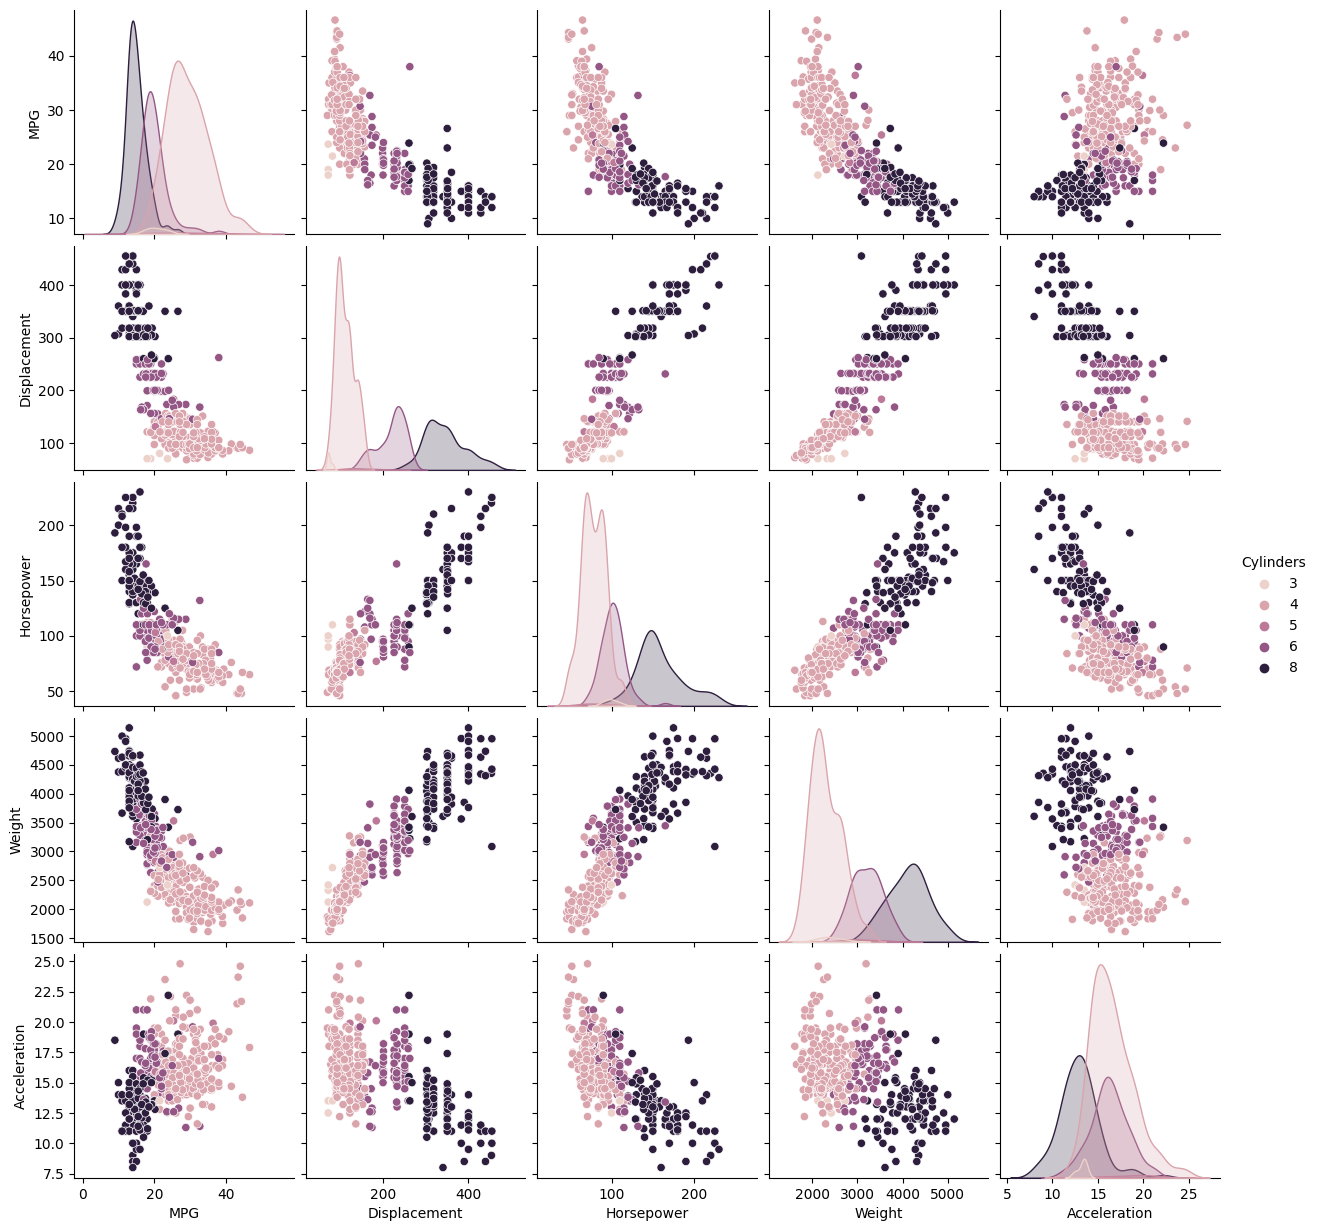

In [100]:
#We will use the Pairplot method to show the relationships between features and label (MPG).
#As shown, there is a strong relationship between them.
# Where there is an inverse relationship between mpg and "displacement", "horsepower", "weight".
#There is a direct relationship between mpg and acceleration.
#This makes a lot of sense according to science and mechanical and physical laws.
#It is also evident that the more cylinders, the lower the mpg
sns.pairplot(df[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration','Cylinders']],hue='Cylinders')


In [101]:
#To confirm what we said previously, I will use covariance and correlation functions to show the relationships mathematically.
cov1=df[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']].cov()
cov1

,MPG,Displacement,Horsepower,Weight,Acceleration
MPG,60.918142,-657.585207,-233.857926,-5517.440704,9.115514
Displacement,-657.585207,10950.367554,3614.033744,82929.100139,-156.994435
Horsepower,-233.857926,3614.033744,1481.569393,28265.620231,-73.186967
Weight,-5517.440704,82929.100139,28265.620231,721484.709008,-976.815253
Acceleration,9.115514,-156.994435,-73.186967,-976.815253,7.611331


In [102]:
corr1=df[['MPG','Displacement', 'Horsepower', 'Weight','Acceleration']].corr()
corr1

,MPG,Displacement,Horsepower,Weight,Acceleration
MPG,1.000000,-0.805127,-0.778427,-0.832244,0.423329
Displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
Horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
Weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
Acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


<Axes: >

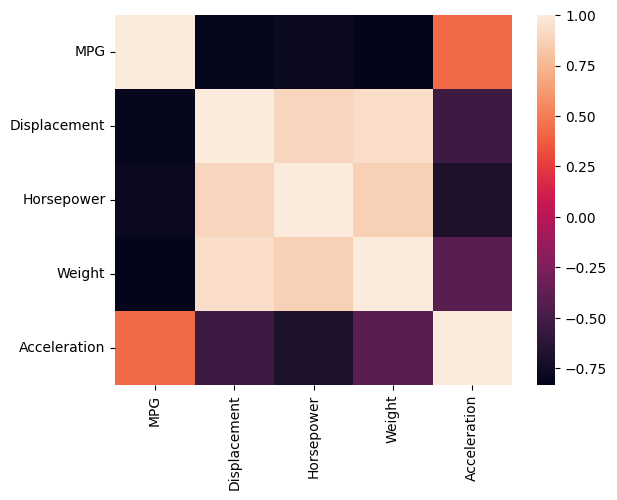

In [103]:
heatmap_corr=sns.heatmap(corr1)
heatmap_corr

In [104]:
#Now we are ready to build the models using the scikit library.
#We will build two models, the first model is a linear regression model with one variable (Horsepower).
#The second model is linear regression with multi-variable.
datasetXsingle=df[['Horsepower']]
datasetXMulti=df[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year','Origin']]
datasetY=df[['MPG']]

In [105]:
# use single-variable input to fit linear regression model
from sklearn.linear_model import LinearRegression
MPG_Pred=LinearRegression()
MPG_Pred.fit(datasetXsingle,datasetY)
MPG_Pred.score(datasetXsingle,datasetY)

0.6059482578894348

In [106]:
# use multi-variable input to fit linear regression model
from sklearn.linear_model import LinearRegression
MPG_Pred=LinearRegression()
MPG_Pred.fit(datasetXMulti,datasetY)
MPG_Pred.score(datasetXMulti,datasetY)

0.8214780764810599

In [107]:
# use Normalized mlti-variable input to fit linear regression model
from sklearn.preprocessing import StandardScaler
MPG_Pred.fit(StandardScaler().fit_transform(datasetXMulti),datasetY)
MPG_Pred.score(StandardScaler().fit_transform(datasetXMulti),datasetY)

0.8214780764810599

In [108]:
from sklearn.preprocessing import StandardScaler
MPG_Pred.fit(StandardScaler().fit_transform(datasetXsingle),datasetY)
MPG_Pred.score(StandardScaler().fit_transform(datasetXsingle),datasetY)

0.6059482578894351